<a href="https://colab.research.google.com/github/Nengbulantentri/TugasPertemuan10/blob/main/MetodeBackropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #library mechine-learning
import matplotlib.pyplot as plt #untuk visualisasi data

In [2]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()
     

11490434/11490434 [==============================] - 0s 0us/step


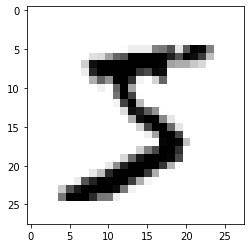

Citra digit angka 5


In [3]:
plt.imshow(x_train[0], cmap="binary") 
plt.show() 
print("Citra digit angka",y_train[0])
     

In [4]:
# konversi integers jadi floats
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')
# normalisasi ke range 0-1
x_train = train_norm / 255.0
x_test = test_norm / 255.0
# one hot encode nilai target
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, input_shape=(784,), activation=tf.nn.relu, kernel_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer="glorot_uniform"))

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:

history = model.fit(x=x_train, y=y_train_enc, epochs=10, validation_split=0.1) 

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.9178 - val_loss: 0.1012 - val_accuracy: 0.9677
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 0.0866 - val_accuracy: 0.9738
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.0782 - val_accuracy: 0.9767
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.0878 - val_accuracy: 0.9755
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9798 - val_loss: 0.0753 - val_accuracy: 0.9795
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0698 - val_accuracy: 0.9805
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0807 - val_accuracy:

In [8]:

test_loss, test_acc = model.evaluate(x=x_test, y=y_test_enc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9786


In [9]:

predictions = model.predict(x_test) 
     

313/313 [==============================] - 1s 2ms/step


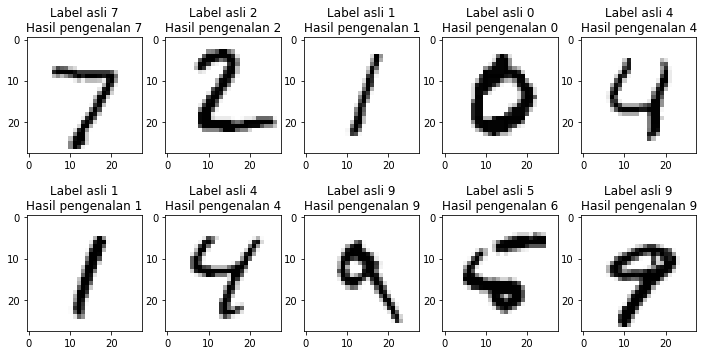

In [10]:
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Label asli {y_test[i]}\nHasil pengenalan {predictions[i].argmax()}")

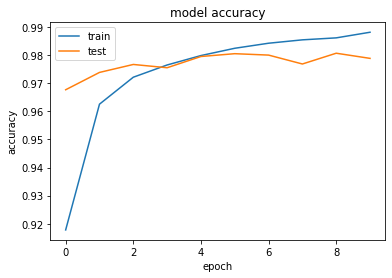

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

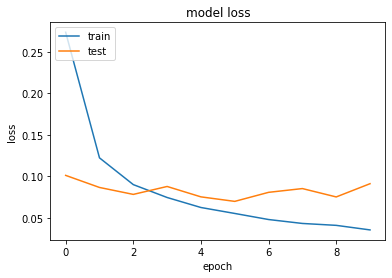

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     